## Import Library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression

## Load Dataset

In [4]:
dataset = np.loadtxt('./sum.csv', delimiter=',')

In [9]:
X = dataset[:,0:2]
y = dataset[:,2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Train Dataset

In [10]:
clf = LinearRegression()

In [11]:
clf = clf.fit(X_train,y_train)

In [15]:
lasso = linear_model.Lasso()
score = clf.score(X_test,y_test)
val_score = cross_val_score(lasso, X_test, y_test)

In [16]:
print("Score : ", score)
print("Val Score : ", val_score)

Score :  1.0
Val Score :  [0.99997526 0.99997408 0.99997491 0.99997552 0.99997601]


In [17]:
y_predicted = clf.predict(X_test)

In [23]:
rmse = mean_squared_error(y_test, y_predicted, squared=True)
print("RMSE : ", rmse)

RMSE :  2.146110738598866e-29


## Visualize

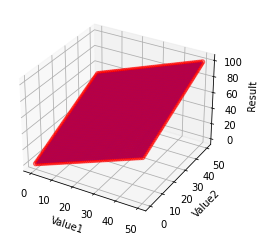

In [8]:
df2=pd.DataFrame(X,columns=['Value1','Value2'])
df2['Result']=pd.Series(y)

x_surf, y_surf = np.meshgrid(np.linspace(df2.Value1.min(), df2.Value1.max(), 100),np.linspace(df2.Value2.min(), df2.Value2.max(), 100))
onlyX = pd.DataFrame({'Value1': x_surf.ravel(), 'Value2': y_surf.ravel()})
fittedY= np.array(clf.predict(onlyX))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['Value1'],df2['Value2'],df2['Result'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Value1')
ax.set_ylabel('Value2')
ax.set_zlabel('Result')
plt.show()

## Predict

In [21]:
clf.predict([[1,3], [25,-3], [101,45]])

array([  4.,  22., 146.])

## Export Model

In [10]:
import joblib
joblib.dump(clf, 'sum.pkl', compress=9)

['sum.pkl']